# 132 Geeky Buildings
There are $N$ buildings in Linear Land. 
They appear in a linear line one after the other and their heights are given in the array arr. 
Geek wants to select three buildings in Linear Land and remodel them as recreational spots. 
The third of the selected building must be taller than the first and shorter than the second.
Can geek build the three-building recreational zone? 

In [3]:
import random
from time import time
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def bar(arr):
    """
    A straightforward solution.
    """
    memo = {}
    for a in arr:
        for key, val in memo.items():
            if a > key and val is not None and a < val:
                return True
            elif val is None or a > val:
                memo[key] = a
        
        # This part definitely can be improved.
        if a not in memo:
            memo[a] = None
            
    return False


def foo_1(arr):
    """
    A better one
    """
    memo, min_key = {}, None
    for a in arr:
        for key, val in memo.items():
            if a > key and val is not None and a < val:
                return True
            
            # This part need to be improved
            elif val is None or a > val:
                memo[key] = a
                
        # Improved
        if min_key is None or a < min_key:
            min_key = a
            memo[a] = None
    return False


def foo_2(arr):
    """
    Try an even better one
    """
    memo, min_key = {}, None
    for a in arr:
        to_remove = []
        for key, val in memo.items():
            if a > key and val is not None and a < val:
                return True
            
            # Improved.
            elif val is None or a > val:
                if key == min_key:
                    memo[key] = a
                else:
                    to_remove.append(key)
                    
        for k in to_remove:
            del memo[k]

        if min_key is None or a < min_key:
            min_key = a
            memo[a] = None
    return False


def foo_2(arr):
    """
    Try an even better one
    """
    memo, min_key = {}, None
    for a in arr:
        to_remove = []
        for key, val in memo.items():
            if a > key and val is not None and a < val:
                return True
            
            # Improved.
            elif val is None or a > val:
                if key == min_key:
                    memo[key] = a
                else:
                    to_remove.append(key)
                    
        for k in to_remove:
            del memo[k]

        if min_key is None or a < min_key:
            min_key = a
            memo[a] = None
    return False


def foo_3(arr):
    """
    Try an even better one
    """
    memo, minimum = [], None
    for a in arr:
        if minimum is None or a < minimum:
            memo.append([a, None])
            minimum = a
            continue
        
        for i in range(len(memo)):
            j = len(memo) - 1 - i
            small, big = memo[j]
            if a > small:
                if big is not None and a < big:
                    return True
                else:
                    if small == minimum:
                        memo[j][1] = a
                    else:
                        memo = memo[j + 1:]
                        break


    return False

## Correctness

In [38]:
for _ in range(20):
    arr = [random.randint(1, 15) for _ in range(5)]
    
    b, f1, f2, f3 = bar(arr), foo_1(arr), foo_2(arr), foo_3(arr)
    if f1 != b or f2 != b or f3 != b:
        print(arr)
        print(f'bar: {b}, foo 1: {f1}, foo 2: {f2}, foo 3: {f3}\n')

## Run time

In [51]:
num_reruns = 500
start, end, step_size = 10, 50, 10
lengths = range(start, end + step_size, step_size)

result = []
for length in lengths:
    arrs = []
    for _ in range(num_reruns):
        arrs.append([random.randint(1, 20) for _ in range(length)])
    arrs = np.array(arrs)
    print(arrs.shape)
    print(arrs)
   
    time0 = time()
    for arr in arrs:
        bar(arr)
    time1 = time()
    time_bar = time1 - time0
    
#     time0 = time()
#     for arr in arrs:
#         foo_1(arr)
#     time1 = time()
#     time_foo_1 = time1 - time0
    
    time0 = time()
    for arr in arrs:
        foo_3(arr)
    time1 = time()
    time_foo_3 = time1 - time0
    
    result.append([time_bar, time_foo_3])

(500, 10)
[[16 18  1 ...  1  6 20]
 [ 8  7  8 ... 20 10 16]
 [10 10 14 ... 10 15 15]
 ...
 [14 19 18 ... 11 10  9]
 [10  1  2 ...  5 16 12]
 [ 2 16  8 ... 19  3 13]]
(500, 20)
[[10 16 11 ... 13 10  4]
 [17 11  8 ... 14 13 19]
 [14 12 11 ... 13 18  3]
 ...
 [16  1  1 ...  1  6  9]
 [12 18 11 ...  5 13 18]
 [ 9 18 13 ... 14  7 18]]
(500, 30)
[[17  8  1 ... 15 12 17]
 [ 5 14  5 ... 15 10  4]
 [ 2  2  8 ... 14 15  5]
 ...
 [10  3  4 ... 12  1  4]
 [12  5 10 ... 18 13 16]
 [ 4  4 13 ...  7  2  2]]
(500, 40)
[[16  8  7 ... 19 11 18]
 [13  3  3 ... 17  8 13]
 [ 3 10 18 ...  3  9  3]
 ...
 [16  6  6 ... 17 18  3]
 [16  9  2 ...  4 17 18]
 [19 15 13 ... 17  2 15]]
(500, 50)
[[12 12 12 ... 15 15 14]
 [ 2  5  6 ... 11 10 18]
 [15 13  8 ...  8 16  7]
 ...
 [ 3  3 12 ...  9  2  1]
 [13 11 14 ...  8  3 12]
 [15  1 13 ... 14 13 12]]


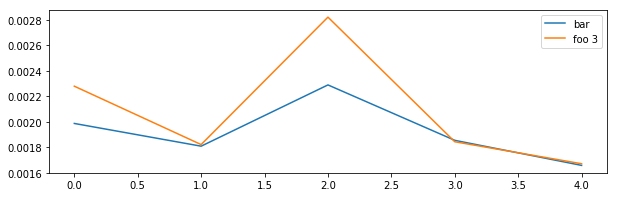

In [52]:
result = np.array(result)
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(result[:, 0], label='bar')
# ax.plot(result[:, 1], label='foo 1')
ax.plot(result[:, 1], label='foo 3')
ax.legend()